In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
from skimage import color

%matplotlib inline

# 2 c)

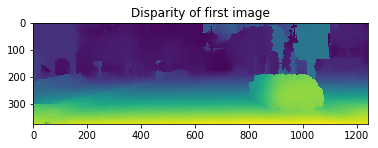

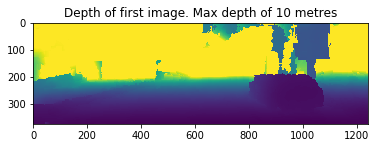

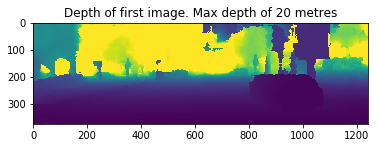

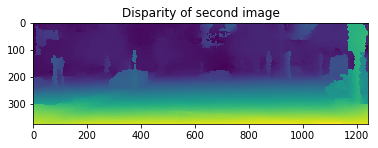

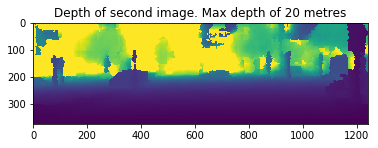

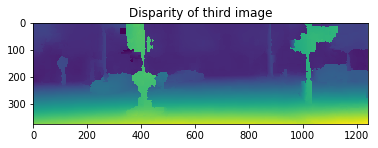

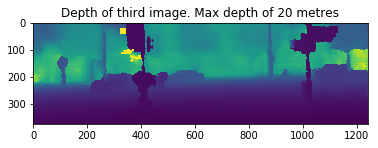

In [2]:
# 2 c)

# camera parameters
f= 721.537700/1000  #convert to m
px= 609.559300/1000  #convert to m
py= 172.854000/1000  #convert to m
baseline= 0.5327119288  # already in metres


# read in the first image
disparity = plt.imread('data/test/results/004945_left_disparity.png')
plt.imshow(disparity)
plt.title("Disparity of first image")
plt.show()


# set all disparity values that are below a threshold to the threshold, so that the depths calculated dont
# get too large (it is of no use to find the depths of objects that are very far away, so we can trat them as all equally far 
# away). This also allows the visualization, since otherwise the large depths would be so much larger than the rest that the
# visualization would be useless (you would have a few very bright points but most of the image would be black)

# let's choose anything above max_depth (in metres) to be considered "too far"
max_depth = 10
# max depth of max_depth m means minimum disparity threshold should be:
min_disp = f*baseline/max_depth


disparity = np.where(disparity<min_disp, min_disp, disparity)

# calculate depth:
depth = f*baseline/disparity
plt.imshow(depth)
plt.title("Depth of first image. Max depth of 10 metres")
plt.show()





# Trying a different max depth (20 m)
# read in the first image
disparity1 = plt.imread('data/test/results/004945_left_disparity.png')


max_depth = 20
# max depth of max_depth m means minimum disparity threshold should be:
min_disp = f*baseline/max_depth


disparity1 = np.where(disparity1<min_disp, min_disp, disparity1)

# calculate depth:
depth1 = f*baseline/disparity1
plt.imshow(depth1)
plt.title("Depth of first image. Max depth of 20 metres")
plt.show()






# read in the second image
disparity2 = plt.imread('data/test/results/004964_left_disparity.png')
plt.imshow(disparity2)
plt.title("Disparity of second image")
plt.show()


disparity2 = np.where(disparity2<min_disp, min_disp, disparity2)

# calculate depth:
depth2 = f*baseline/disparity2
plt.imshow(depth2)
plt.title("Depth of second image. Max depth of 20 metres")
plt.show()




# read in the third image
disparity3 = plt.imread('data/test/results/005002_left_disparity.png')
plt.imshow(disparity3)
plt.title("Disparity of third image")
plt.show()


disparity3 = np.where(disparity3<min_disp, min_disp, disparity3)

# calculate depth:
depth3 = f*baseline/disparity3
plt.imshow(depth3)
plt.title("Depth of third image. Max depth of 20 metres")
plt.show()


# 2 d)

In [3]:
# 2 d)

import scipy.io as sio
import matplotlib.patches as mpatches


def showDetections(im, mat_contents, title):

    dets = mat_contents['dets']

    fig = plt.figure()
    ax = plt.subplot(111)
    
    # legend (clearer than labeling bounding boxes on the image):
    red_patch = mpatches.Patch(color='red', label='Car')
    blue_patch = mpatches.Patch(color='blue', label='Person')
    cyan_patch = mpatches.Patch(color='cyan', label='Cyclist')
    ax.legend(handles=[red_patch, blue_patch, cyan_patch], loc='lower left', bbox_to_anchor=(1.0, 0))
    plt.title(title)


    # car detections
    for d in dets[0][0]:
        # coordinates of bottom left corner:
        x = d[0]
        y = d[3]

        # dimensions of bounding box:
        width = d[2]-d[0]
        height = d[1]-d[3]

        border = plt.Rectangle([x,y], width, height, fill=False, color='red', lw=3.0)
        ax.add_patch(border)

    # people detections
    for d in dets[1][0]:
        # coordinates of bottom left corner:
        x = d[0]
        y = d[3]

        # dimensions of bounding box:
        width = d[2]-d[0]
        height = d[1]-d[3]

        border = plt.Rectangle([x,y], width, height, fill=False, color='blue', lw=3.0)
        ax.add_patch(border)


    # bike detections:
    for d in dets[2][0]:
        # coordinates of bottom left corner:
        x = d[0]
        y = d[3]

        # dimensions of bounding box:
        width = d[2]-d[0]
        height = d[1]-d[3]

        border = plt.Rectangle([x,y], width, height, fill=False, color='cyan', lw=3.0)
        ax.add_patch(border)

    ax.imshow(im)
    plt.show()

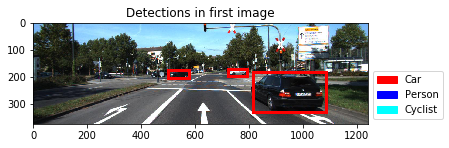

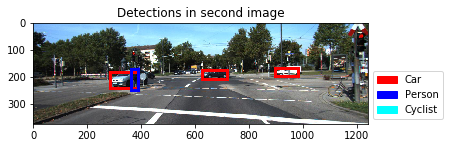

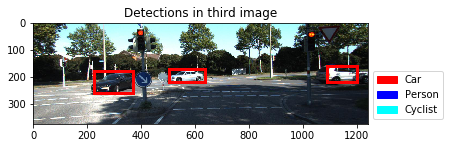

In [4]:
# first image
im1 = plt.imread('data/test/left/004945.jpg')
mat_contents1 = sio.loadmat("data/test/results/dets-test/004945_dets.mat")
showDetections(im1, mat_contents1, "Detections in first image")


# second image
im2 = plt.imread('data/test/left/004964.jpg')
mat_contents2 = sio.loadmat("data/test/results/dets-test/004964_dets.mat")
showDetections(im2, mat_contents2, "Detections in second image")
# note that the bike was not detected in the matlab data which is why a box was not drawn around it


# third image
im3 = plt.imread('data/test/left/005002.jpg')
mat_contents3 = sio.loadmat("data/test/results/dets-test/005002_dets.mat")
showDetections(im3, mat_contents3, "Detections in third image")


# 2 e)

Outline of my procedure for this question

#To compute the 3D location of each object, use the equations from question 1 b). Take the center of the detection boxes from 
2 d) to be the center of the object (x', y'). We can get the depth, z, from part c), and f, px, and py, are in the text file
with the camera parameters. Therefore, we can solve for x and y using the equations from part 



Thought process for segmentation:
near most of the edges of an object (note that this doesnt apply for edges that are touching another object, like a person's
feet touching the ground), the depth will change significantly, as just outside the edge is the background, whigh is further
away than the object. This means that the gradient magnitude of the depth will be high at pixels on the edge of the object.

Therefore, the strategy is to calculate the gradient magnitude of the depth of the image (need to set max depth large enough)
and then within each detection box from part d), colour the pixels with high gradient magnitudes (above some threshold). 

This strategy will cause edges to be drawn around background objects, so we will also impose the condition that the pixel depth
must also be close to the depth of the object in order for the pixel to be considered an edge of the object. We have the object
depths from the first part of 2 e)

# Note: 
When I did this question, I thought segmentation just meant to outline the car, not classify each pixel as "car" or "not car". If I had properly understood what segmentation was I would have tried clustering within the bounding box using colour and depth as features, as well as distance from center of bounding box (with the most weight on depth).

In [6]:
# Computing 3D location
def get3dLocation(im, dets, disp, f, T, px, py, title):
    '''
    Gets the 3D locations of the objects detected in im (stored in dets), given camera parameters f (focal length), T (baseline)
    and px and py, as well as the disparity 
    
    returns a list of the car coordinates, people coordinates, and bike coordinates, where each element is a list containing 
    tuples (x, y, z) of the 3D locations of each object of that class.
    
    '''
    
    #claculate depth:
    depth = f*T/disp
    

    # let x_prime and y_prime be the coordinates of the center of the object in the image
    
    # car detections
    car_coords = []
    for d in dets[0][0]:
        # coordinates of center of bounding box:
        x_prime = int((d[2]+d[0])/2)
        y_prime = int((d[1]+d[3])/2)

        # 3D coordinates (in camera frame of reference):
        z = depth[y_prime, x_prime]
        x = z*(x_prime - px)/f
        y = z*(y_prime - py)/f
        
        car_coords.append((x,y,z))
        
    # people detections
    people_coords = []
    for d in dets[1][0]:
        # coordinates of center of bounding box:
        x_prime = int((d[2]+d[0])/2)
        y_prime = int((d[1]+d[3])/2)

        # 3D coordinates (in camera frame of reference):
        z = depth[y_prime, x_prime]
        x = z*(x_prime - px)/f
        y = z*(y_prime - py)/f
        
        people_coords.append((x,y,z))
        
    # bike detections
    bike_coords = []
    for d in dets[2][0]:
        # coordinates of center of bounding box:
        x_prime = int((d[2]+d[0])/2)
        y_prime = int((d[1]+d[3])/2)

        # 3D coordinates (in camera frame of reference):
        z = depth[y_prime, x_prime]
        x = z*(x_prime - px)/f
        y = z*(y_prime - py)/f
        
        bike_coords.append((x,y,z))

    
    return [car_coords, people_coords, bike_coords]

In [7]:
# camera parameters
f= 721.537700/1000  #convert to m
px= 609.559300/1000  #convert to m
py= 172.854000/1000  #convert to m
baseline= 0.5327119288  # already in metres

# first image
im1 = plt.imread('data/test/left/004945.jpg')
mat_contents1 = sio.loadmat("data/test/results/dets-test/004945_dets.mat")
dets1 = mat_contents1['dets']

# disparity
disparity = plt.imread('data/test/results/004945_left_disparity.png')
max_depth = 50
min_disp = f*baseline/max_depth
disparity = np.where(disparity<min_disp, min_disp, disparity)

locs_3d = get3dLocation(im1, dets1, disparity, f, baseline, px, py, "Detections in first image")
print("Here are the 3D coordinates (in metres) of the three cars detected in the first image. Notice no people or bikes were detected.")
print(locs_3d)



# second image
im2 = plt.imread('data/test/left/004964.jpg')
mat_contents2 = sio.loadmat("data/test/results/dets-test/004964_dets.mat")
dets2 = mat_contents2['dets']

# disparity
disparity2 = plt.imread('data/test/results/004964_left_disparity.png')
max_depth = 50
min_disp = f*baseline/max_depth
disparity2 = np.where(disparity2<min_disp, min_disp, disparity2)

locs_3d = get3dLocation(im2, dets2, disparity2, f, baseline, px, py, "Detections in first image")

print("\n\nHere are the 3D coordinates (in metres) of the three cars and the person detected in the second image")
print(locs_3d)


# third image
im3 = plt.imread('data/test/left/005002.jpg')
mat_contents3 = sio.loadmat("data/test/results/dets-test/005002_dets.mat")
dets3 = mat_contents3['dets']

# disparity
disparity3 = plt.imread('data/test/results/005002_left_disparity.png')
max_depth = 50
min_disp = f*baseline/max_depth
disparity3 = np.where(disparity3<min_disp, min_disp, disparity3)

locs_3d = get3dLocation(im3, dets3, disparity3, f, baseline, px, py, "Detections in first image")
print("\n\nHere are the 3D coordinates (in metres) of the three cars detected in the third image")
print(locs_3d)


Here are the 3D coordinates (in metres) of the three cars detected in the first image. Notice no people or bikes were detected.
[[(2296.7522732978296, 618.89350677848654, 1.7455341), (12419.664904690251, 3014.3918262230727, 11.831753), (6552.9111310566423, 2314.7423619590154, 8.7983932)], [], []]


Here are the 3D coordinates (in metres) of the three cars and the person detected in the second image
[[(7729.2558238000656, 2188.6090323779363, 8.3189573), (9882.4757286823733, 1904.3457860662579, 7.5987334), (2156.0160036084962, 1351.2473773785957, 4.6245275)], [(2196.3061616147829, 1233.4916119121608, 4.2215185)], []]


Here are the 3D coordinates (in metres) of the three cars detected in the third image
[[(4930.0957001806692, 1695.579169341773, 6.2474704), (1637.9230349427826, 1195.6954761427942, 3.9606605), (7303.8628546439468, 1211.5370691355979, 4.6050825)], [], []]


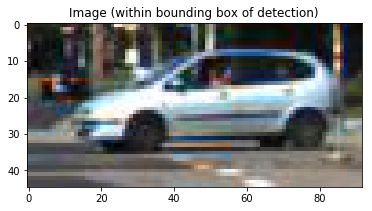

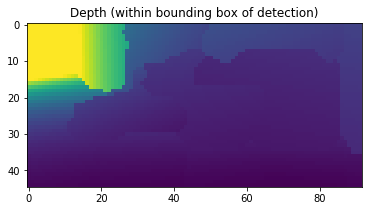

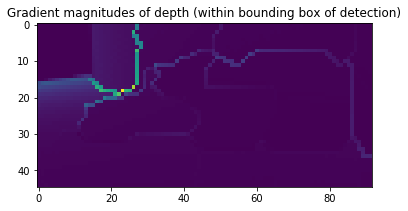

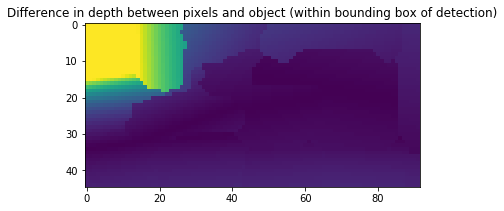

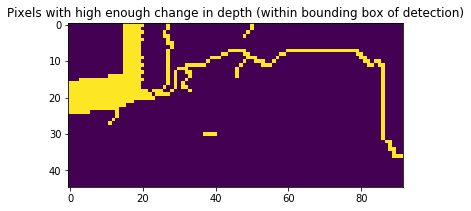

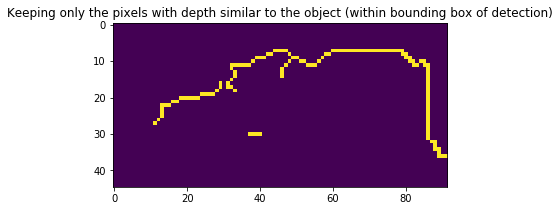

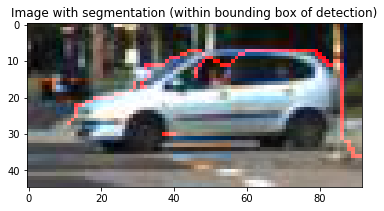

In [120]:

import scipy as sp
def gradMagnitude(Z):
    '''
    Calculates and returns the gradient magnitudes and partial derivatives of the given depth matrix Z
    
    return: 2D matrix containing the magnitude of the gradient
    '''
    
    partialX = np.array([1, -1])  # filter to compute partial derivative in x (using convolution)
    partialY = np.array([1, -1])  # filter to compute partial derivative in x (using convolution)

    # initialize matrices of horizontal and vertical derivatives
    dX = np.zeros(np.shape(Z))
    dY = np.zeros(np.shape(Z))

    # apply horizontal derivative to each row
    for i in range(np.shape(Z)[0]):
        dX[i] = sp.signal.convolve(Z[i],partialX, mode='same')

    # apply vertical derivative to each column
    for i in range(np.shape(Z)[1]):
        dY[:,i] = sp.signal.convolve(Z[:,i],partialY, mode='same') 
    
    gm = np.sqrt(dX**2 + dY**2)
    
    return gm


# camera parameters
f= 721.537700/1000  #convert to m
px= 609.559300/1000  #convert to m
py= 172.854000/1000  #convert to m
baseline= 0.5327119288  # already in metres

# first image
im1 = plt.imread('data/test/left/004945.jpg')
mat_contents1 = sio.loadmat("data/test/results/dets-test/004945_dets.mat")
dets1 = mat_contents1['dets']

# disparity
disparity = plt.imread('data/test/results/004945_left_disparity.png')
max_depth = 50  # will only detect objects within 50m for segmentation
min_disp = f*baseline/max_depth
disparity = np.where(disparity<min_disp, min_disp, disparity)

#claculate depth:
depth = f*baseline/disparity



# TODO: loop through object locations and detections with index i for object type, and j for detection #

i = 0
j = 1


# object locations
locs_3d = get3dLocation(im1, dets1, disparity, f, baseline, px, py, "Detections in first image")

# gradient magnitudes of the depth
gm = gradMagnitude(depth)



d = dets1[i][0][j]  # detection array containing bounding box
l = locs_3d[i][j]  # 3d location of object

# make the box a little bigger, since it usually doesn't include the whole object
xl = int(d[0])-10
xr = int(d[2])+10
yt = int(d[1])-10
yb = int(d[3])+10



# image within bounding box
bbox = im1[yt:yb, xl:xr]
plt.imshow(bbox)
plt.title("Image (within bounding box of detection)")
plt.show()

# depth matrix within bounding box
z_bbox = depth[yt:yb, xl:xr]
plt.imshow(z_bbox)
plt.title("Depth (within bounding box of detection)")
plt.show()

# depth gradient magnitudes within bounding box
z_grad_bbox = gm[yt:yb, xl:xr]
plt.imshow(z_grad_bbox)
plt.title("Gradient magnitudes of depth (within bounding box of detection)")
plt.show()



obj_depth = l[2]
z_thresh = 4  # depth threshold in metres
grad_thresh = 0.05  # threshold for gradient magnitudes of the depth

dist_to_obj_bbox = np.abs(np.array(z_bbox) - obj_depth)  # matrix containing distances (along depth axis) of each 
                                                                    # pixel within the bounding box to the object center

plt.imshow(dist_to_obj_bbox)
plt.title("Difference in depth between pixels and object (within bounding box of detection)")
plt.show()
    
# label pixels with high enough change in depth
seg = np.where((z_grad_bbox > grad_thresh*np.max(z_grad_bbox)), 255, 0)
plt.imshow(seg)
plt.title("Pixels with high enough change in depth (within bounding box of detection)")
plt.show()



# only keep pixels with depth close to the object's depth
seg = np.where(dist_to_obj_bbox < z_thresh, seg, 0)
plt.imshow(seg)
plt.title("Keeping only the pixels with depth similar to the object (within bounding box of detection)")
plt.show()


im_channel1 = bbox[:, :, 0]
im_channel2 = bbox[:, :, 1]
im_channel3 = bbox[:, :, 2]
im_channel1 = np.where(seg==255, 255, im_channel1)

im_out = np.array([im_channel1, im_channel2, im_channel3])
im_out = np.moveaxis(im_out, 0, 2)

plt.imshow(im_out)
plt.title("Image with segmentation (within bounding box of detection)")
plt.show()